In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
doctor= pd.read_csv("C:\\Users\\user\\Desktop\\dataset\\nursingAndMidwife.csv")
nurse=pd.read_csv("C:\\Users\\user\\Desktop\\dataset\\medicalDoctors.csv")
pharmacist=pd.read_csv("C:\\Users\\user\\Desktop\\dataset\\pharmacists.csv")

In [19]:
doctor.head(10)

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,"Nursing and midwifery personnel (per 10,000)",1.76
1,Afghanistan,2016,"Nursing and midwifery personnel (per 10,000)",1.48
2,Afghanistan,2015,"Nursing and midwifery personnel (per 10,000)",1.30
3,Afghanistan,2014,"Nursing and midwifery personnel (per 10,000)",1.48
4,Afghanistan,2013,"Nursing and midwifery personnel (per 10,000)",2.50
5,Afghanistan,2009,"Nursing and midwifery personnel (per 10,000)",6.08
6,Afghanistan,2008,"Nursing and midwifery personnel (per 10,000)",4.97
7,Afghanistan,2007,"Nursing and midwifery personnel (per 10,000)",4.96
8,Afghanistan,2006,"Nursing and midwifery personnel (per 10,000)",4.40
9,Afghanistan,2005,"Nursing and midwifery personnel (per 10,000)",5.82


In [20]:
nurse.head()

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2016,"Medical doctors (per 10,000)",2.78
1,Afghanistan,2015,"Medical doctors (per 10,000)",2.85
2,Afghanistan,2014,"Medical doctors (per 10,000)",2.98
3,Afghanistan,2013,"Medical doctors (per 10,000)",2.85
4,Afghanistan,2012,"Medical doctors (per 10,000)",2.41


In [21]:
pharmacist.head()

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2016,"Pharmacists (per 10,000)",0.47
1,Afghanistan,2015,"Pharmacists (per 10,000)",0.50
2,Afghanistan,2014,"Pharmacists (per 10,000)",0.51
3,Afghanistan,2012,"Pharmacists (per 10,000)",0.27
4,Afghanistan,2011,"Pharmacists (per 10,000)",0.28


In [22]:
allCountries = doctor['Location'].unique().tolist()

In [27]:
def compareCountries(countries):
    fig = plt.figure(figsize = (10,10))
    ax1 = plt.subplot2grid((1,1),(0,0))

    for country in countries:
        if country not in allCountries:
            print(f"Country {country} DO NOT EXIST ")
            return
        tempData = doctor[doctor['Location'] == country]
        tempData['Period'] = pd.to_datetime(tempData['Period'], format = '%Y')
        ax1.plot(tempData['Period'], tempData['First Tooltip'], label=country)
        
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    plt.grid()
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Doctors")
    plt.title("Medical doctors (per 10,000)")
    plt.show()

In [28]:
def autoLabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, '%d'%int(height), ha='center', va = 'bottom')

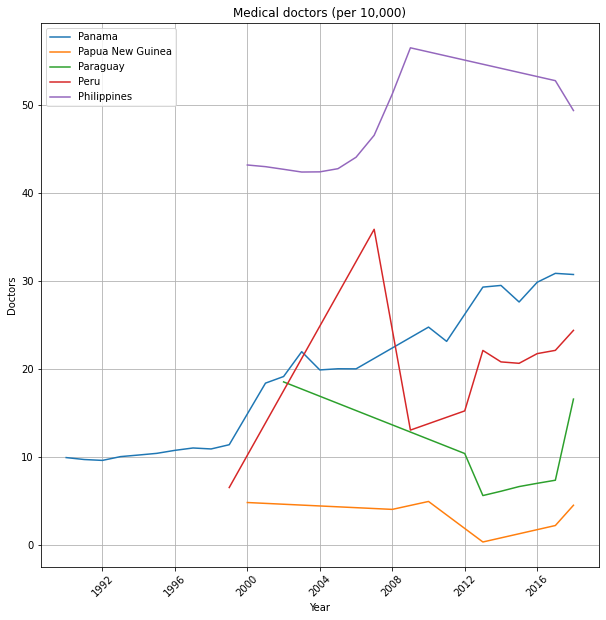

In [29]:
import random
i=random.randint(0,len(allCountries)-5)
countries=allCountries[i:i+5]
compareCountries(countries)
    

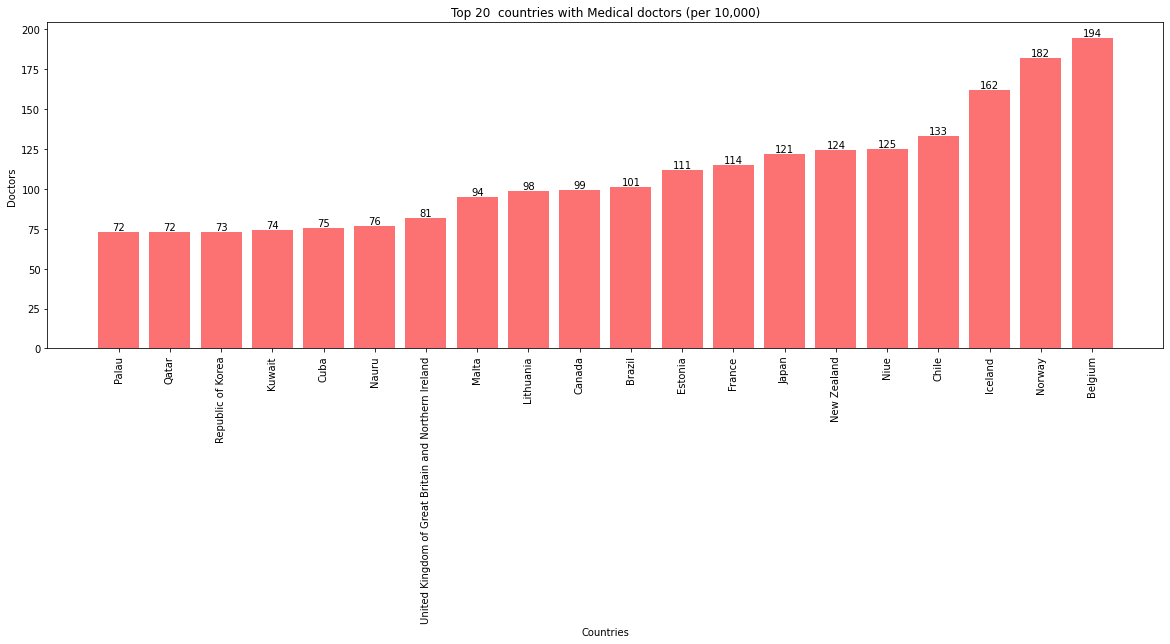

In [32]:
tempData = doctor[doctor['Period'] == 2018]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[-20:]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Doctors")
plt.title("Top 20  countries with Medical doctors (per 10,000)")
plt.show()

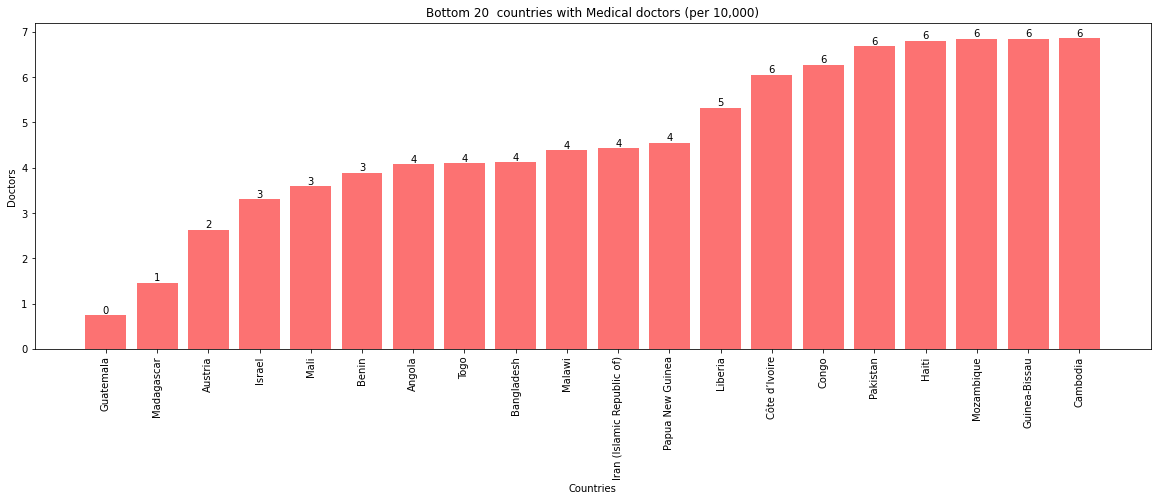

In [35]:
tempData = doctor[doctor['Period'] == 2018]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[:20]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Doctors")
plt.title("Bottom 20  countries with Medical doctors (per 10,000)")
plt.show()

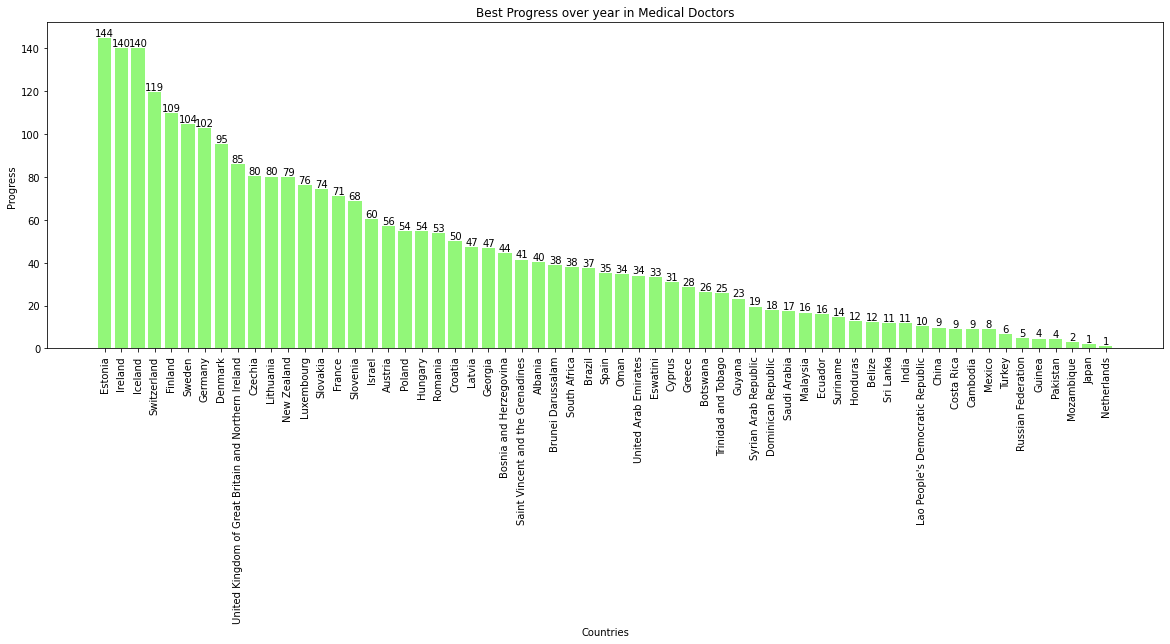

In [42]:
tempData = doctor[doctor['Period'] == 2016]
bestCountries=tempData['Location'].values.tolist()
tempData = doctor[doctor.Location.isin(bestCountries)]
tempData = tempData[tempData['Period'] == 2000]
tempData.sort_values('First Tooltip', ascending=False, inplace=True)

fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempData['Location'], tempData['First Tooltip'], color = "#92f779")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Progress")
plt.title("Best Progress over year in Medical Doctors")
plt.show()

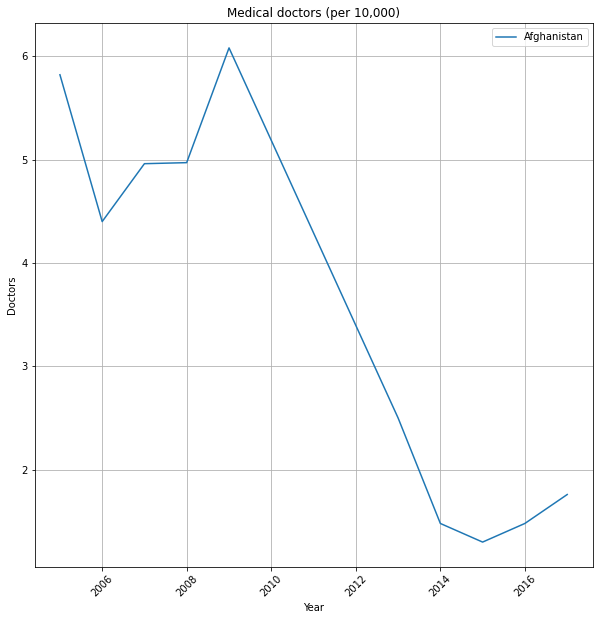

In [43]:
bestCountries=doctor['Location'].values.tolist()
countries=bestCountries[0:1]
compareCountries(countries)

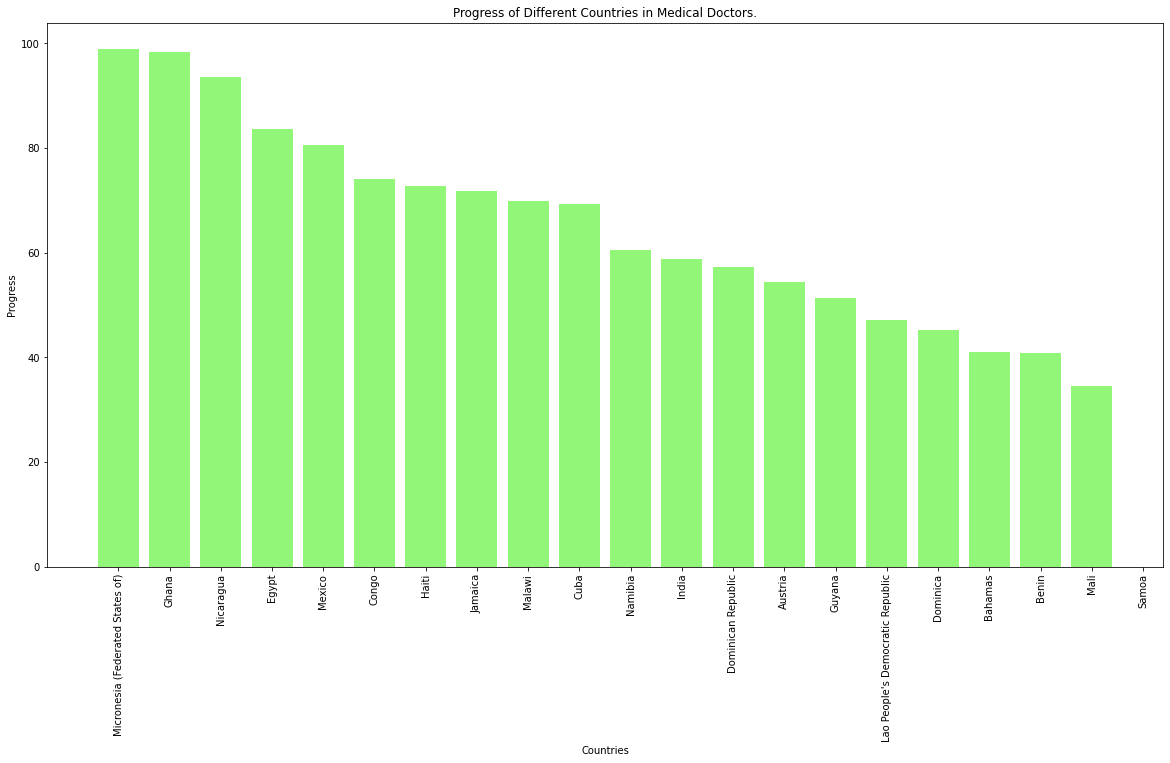

In [44]:

tempData2018 = doctor[doctor['Period'] == 2018]
tempData2000 = doctor[doctor['Period'] == 2000]
tempData2018.reset_index(inplace=True)
tempData2000.reset_index(inplace=True)
tempData = tempData2018.join(tempData2000, lsuffix='_18', rsuffix='_00')
tempData['progress'] = tempData['First Tooltip_00'] - tempData['First Tooltip_18']
tempData = tempData[['Location_18', 'progress']].sort_values('progress', ascending=False)
tempDataTop = tempData[:20]
tempDataBot = tempData[-20:]

fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
rects1 = ax1.bar(tempDataTop['Location_18'], tempDataTop['progress'], color = '#92f779')
rects1 = ax1.bar(tempDataBot['Location_18'], tempDataBot['progress'], color = '#fc7272')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.xlabel("Countries")
plt.ylabel("Progress")
plt.title("Progress of Different Countries in Medical Doctors.")
plt.show()

In [45]:
allCountries = nurse['Location'].unique().tolist()

In [50]:
def compareCountries(countries):
    fig = plt.figure(figsize = (10,10))
    ax1 = plt.subplot2grid((1,1),(0,0))

    for country in countries:
        if country not in allCountries:
            print(f"Country {country} DO NOT EXIST ")
            return
        tempData = doctor[doctor['Location'] == country]
        tempData['Period'] = pd.to_datetime(tempData['Period'], format = '%Y')
        ax1.plot(tempData['Period'], tempData['First Tooltip'], label=country)
        
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    plt.grid()
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Nursing Personnel")
    plt.title("Nursing and midwifery personnel (per 10,000)")
    plt.show()

In [51]:
def autoLabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, '%d'%int(height), ha='center', va = 'bottom')

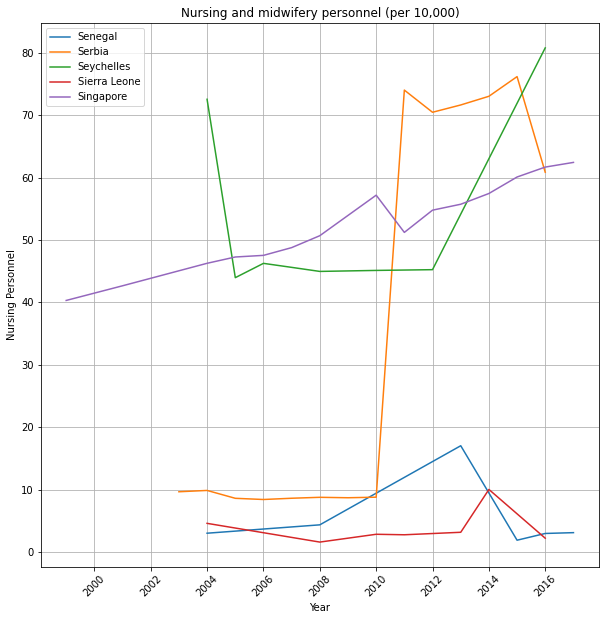

In [52]:
import random
i=random.randint(0,len(allCountries)-5)
countries=allCountries[i:i+5]
compareCountries(countries)

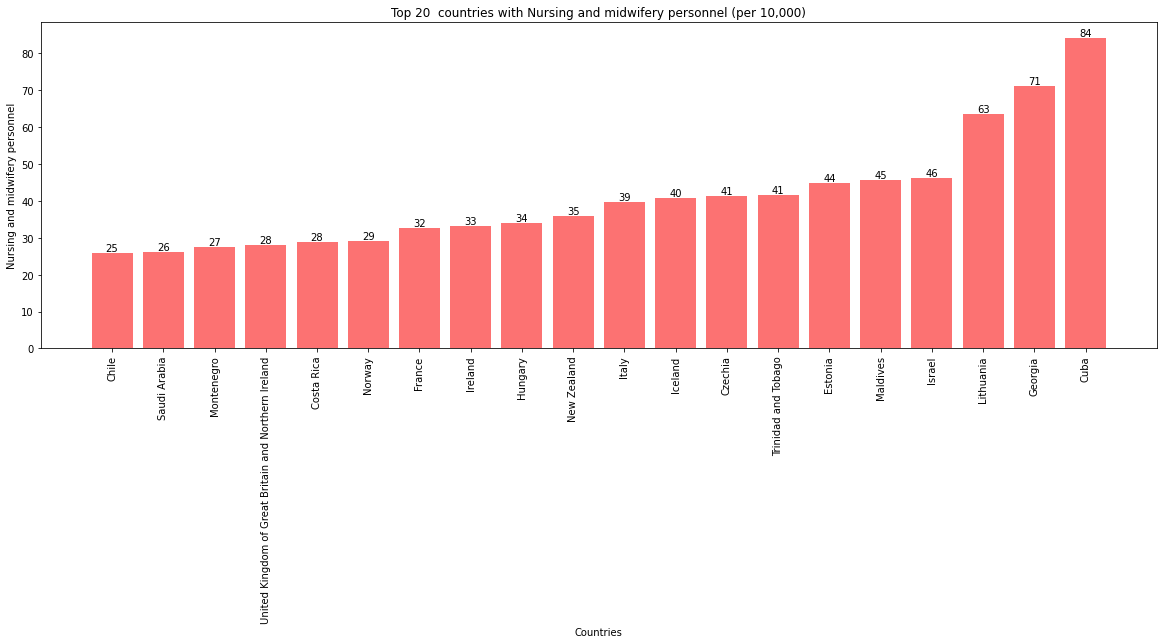

In [53]:
tempData = nurse[nurse['Period'] == 2018]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[-20:]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Nursing and midwifery personnel")
plt.title("Top 20  countries with Nursing and midwifery personnel (per 10,000)")
plt.show()

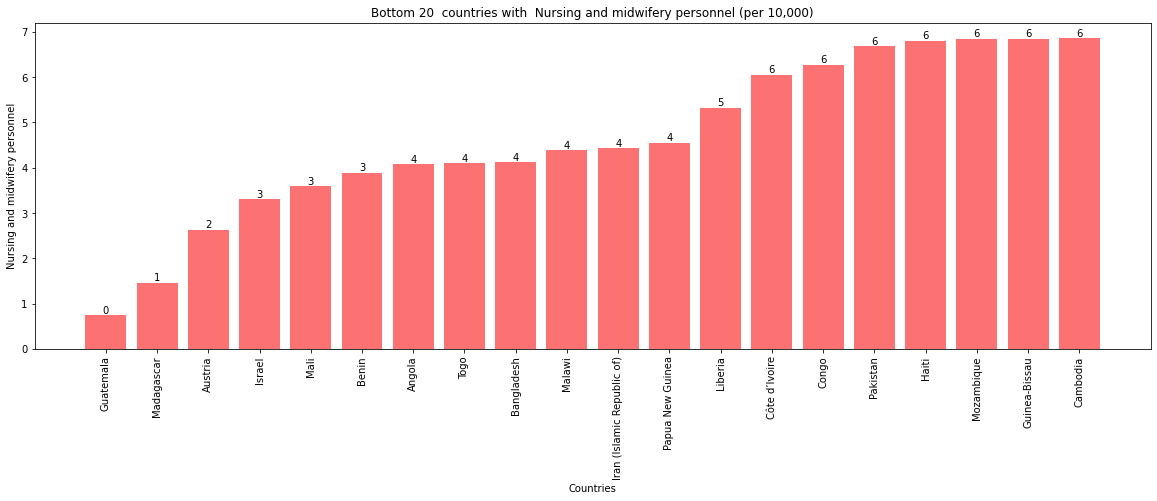

In [54]:
tempData = nurse[nurse['Period'] == 2018]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[:20]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Nursing and midwifery personnel")
plt.title("Bottom 20  countries with  Nursing and midwifery personnel (per 10,000)")
plt.show()

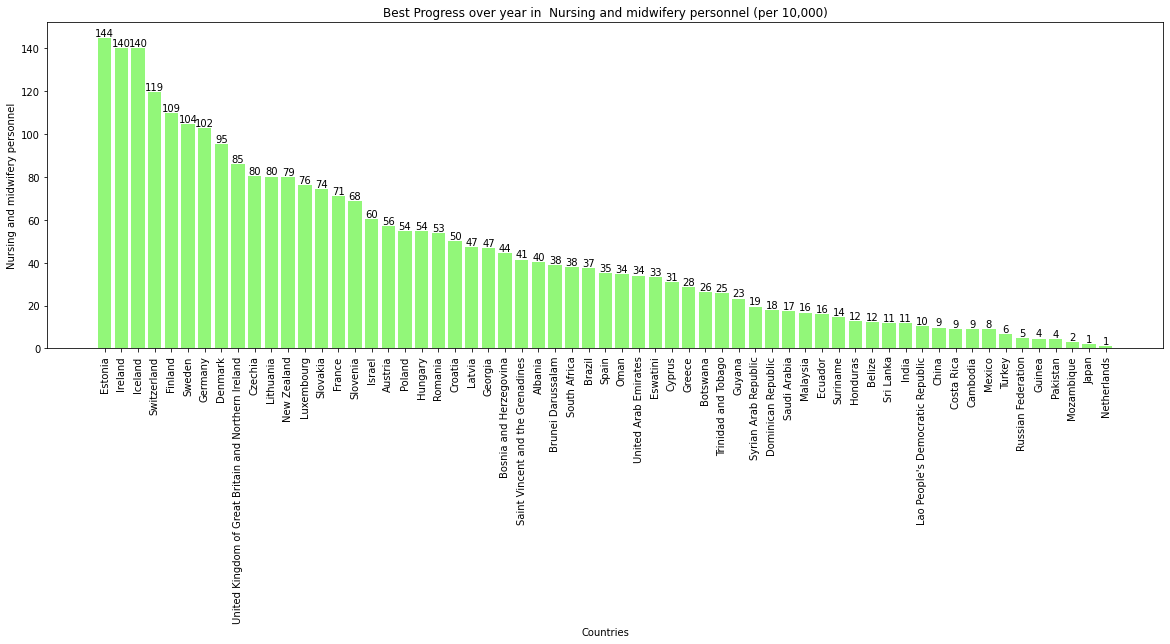

In [55]:
tempData = doctor[doctor['Period'] == 2016]
bestCountries=tempData['Location'].values.tolist()
tempData = doctor[doctor.Location.isin(bestCountries)]
tempData = tempData[tempData['Period'] == 2000]
tempData.sort_values('First Tooltip', ascending=False, inplace=True)

fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempData['Location'], tempData['First Tooltip'], color = "#92f779")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Nursing and midwifery personnel")
plt.title("Best Progress over year in  Nursing and midwifery personnel (per 10,000)")
plt.show()

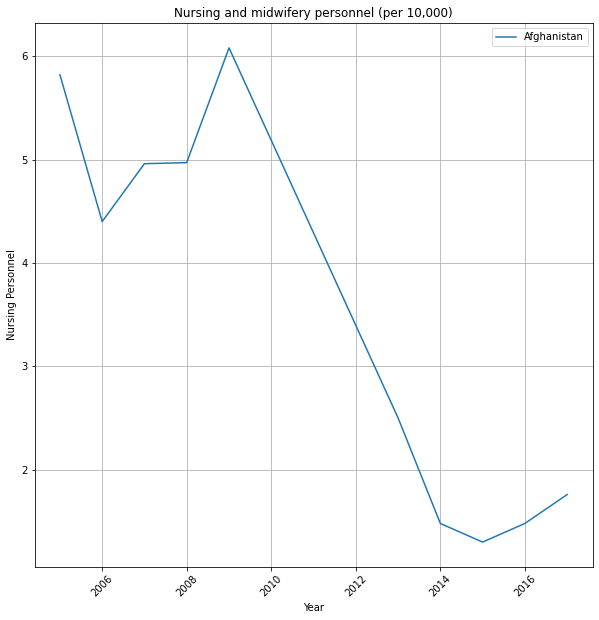

In [56]:
bestCountries=doctor['Location'].values.tolist()
countries=bestCountries[0:1]
compareCountries(countries)

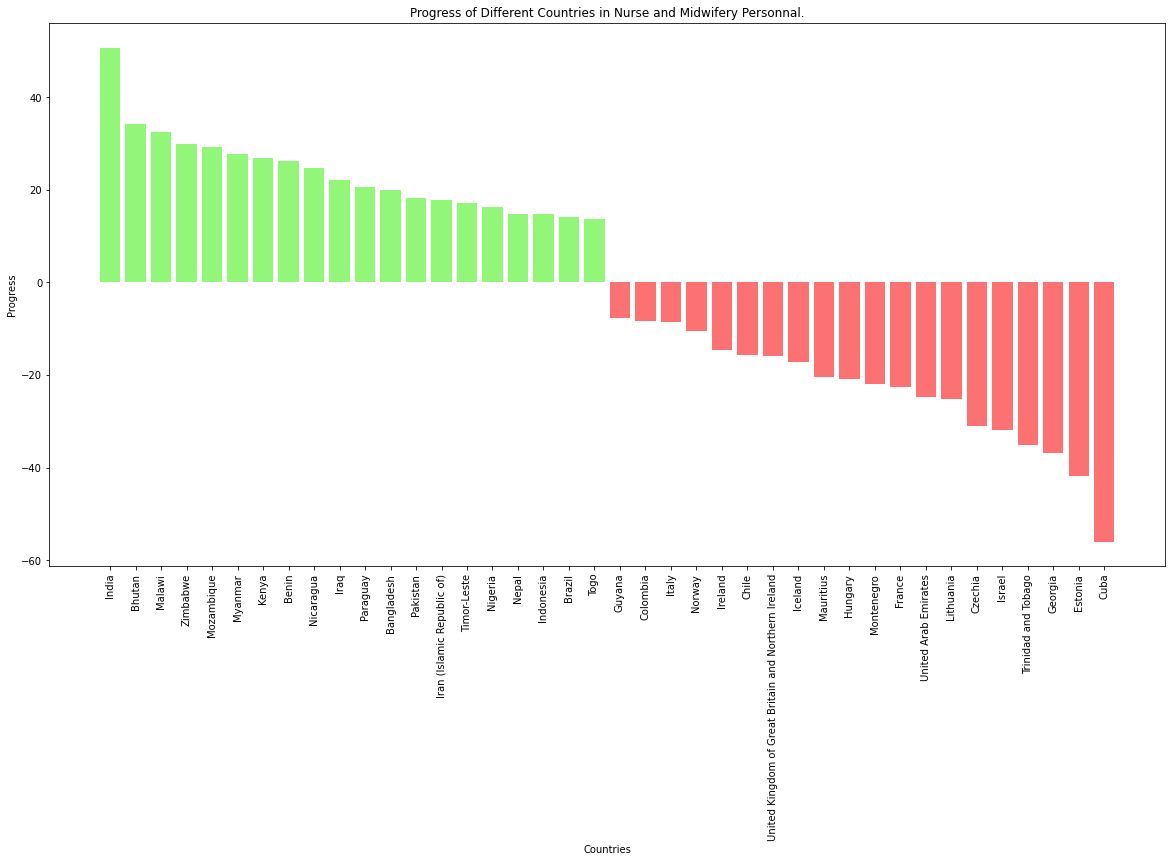

In [58]:
tempData2018 = nurse[nurse['Period'] == 2018]
tempData2000 = nurse[nurse['Period'] == 2000]
tempData2018.reset_index(inplace=True)
tempData2000.reset_index(inplace=True)
tempData = tempData2018.join(tempData2000, lsuffix='_18', rsuffix='_00')
tempData['progress'] = tempData['First Tooltip_00'] - tempData['First Tooltip_18']
tempData = tempData[['Location_18', 'progress']].sort_values('progress', ascending=False)
tempDataTop = tempData[:20]
tempDataBot = tempData[-20:]

fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
rects1 = ax1.bar(tempDataTop['Location_18'], tempDataTop['progress'], color = '#92f779')
rects1 = ax1.bar(tempDataBot['Location_18'], tempDataBot['progress'], color = '#fc7272')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.xlabel("Countries")
plt.ylabel("Progress")
plt.title("Progress of Different Countries in Nurse and Midwifery Personnal.")
plt.show()

In [61]:
allCountries = pharmacist['Location'].unique().tolist()

In [63]:
def compareCountries(countries):
    fig = plt.figure(figsize = (10,10))
    ax1 = plt.subplot2grid((1,1),(0,0))

    for country in countries:
        if country not in allCountries:
            print(f"Country {country} DO NOT EXIST ")
            return
        tempData = pharmacist[pharmacist['Location'] == country]
        tempData['Period'] = pd.to_datetime(tempData['Period'], format = '%Y')
        ax1.plot(tempData['Period'], tempData['First Tooltip'], label=country)
        
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    plt.grid()
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Pharmacists")
    plt.title("Pharmacists  (per 10,000)")
    plt.show()

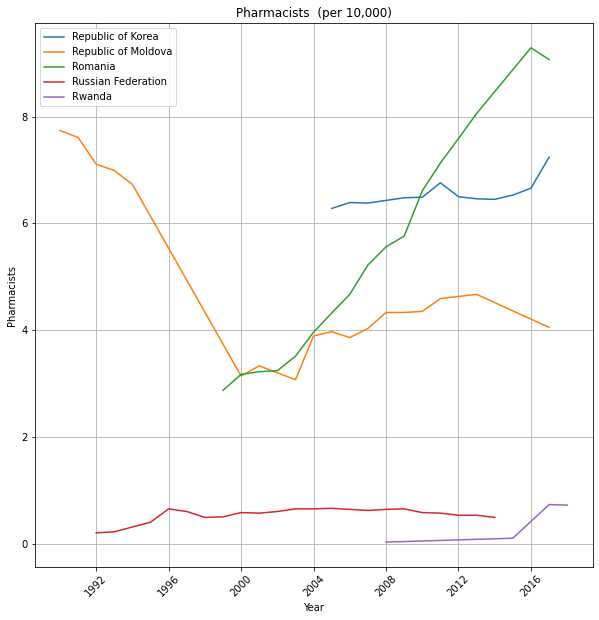

In [64]:
import random
i=random.randint(0,len(allCountries)-5)
countries=allCountries[i:i+5]
compareCountries(countries)

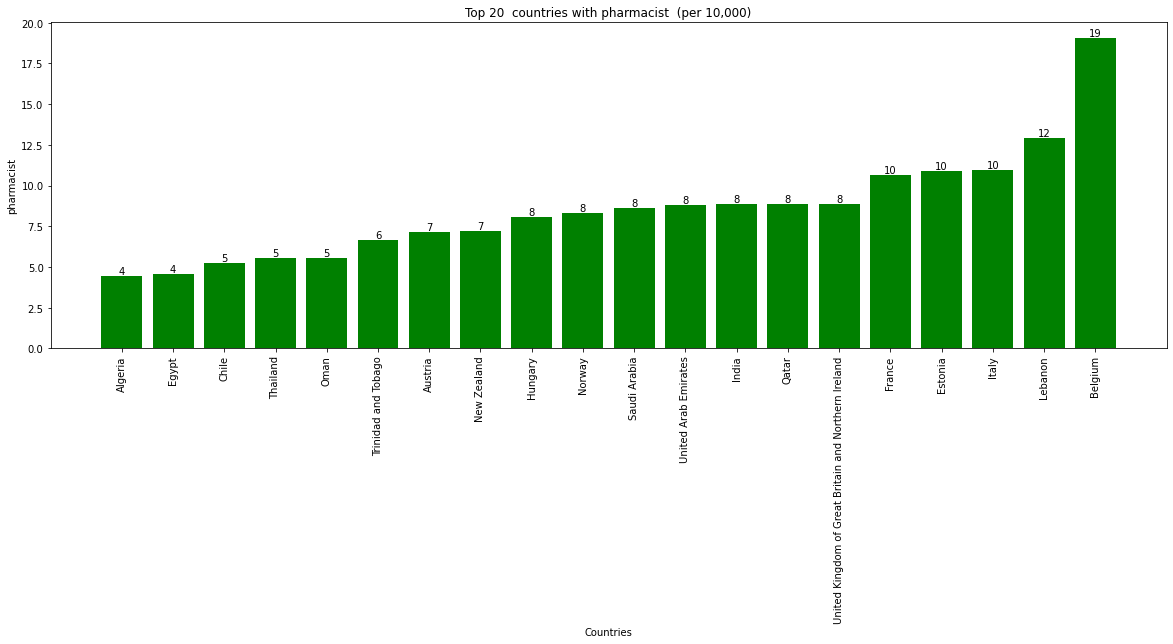

In [68]:
tempData = pharmacist[pharmacist['Period'] == 2018]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[-20:]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "green")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("pharmacist")
plt.title("Top 20  countries with pharmacist  (per 10,000)")
plt.show()

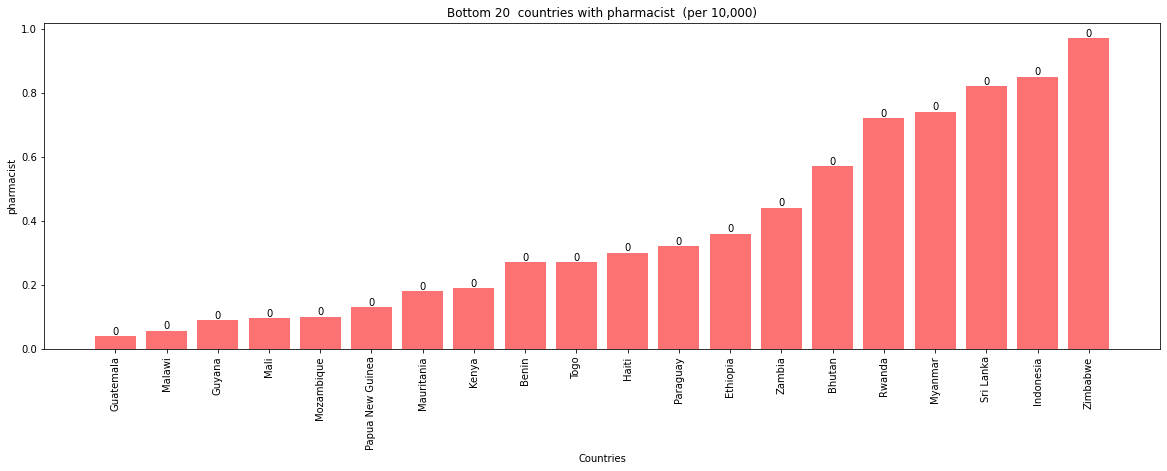

In [69]:
tempData = pharmacist[pharmacist['Period'] == 2018]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[:20]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("pharmacist")
plt.title("Bottom 20  countries with pharmacist  (per 10,000)")
plt.show()

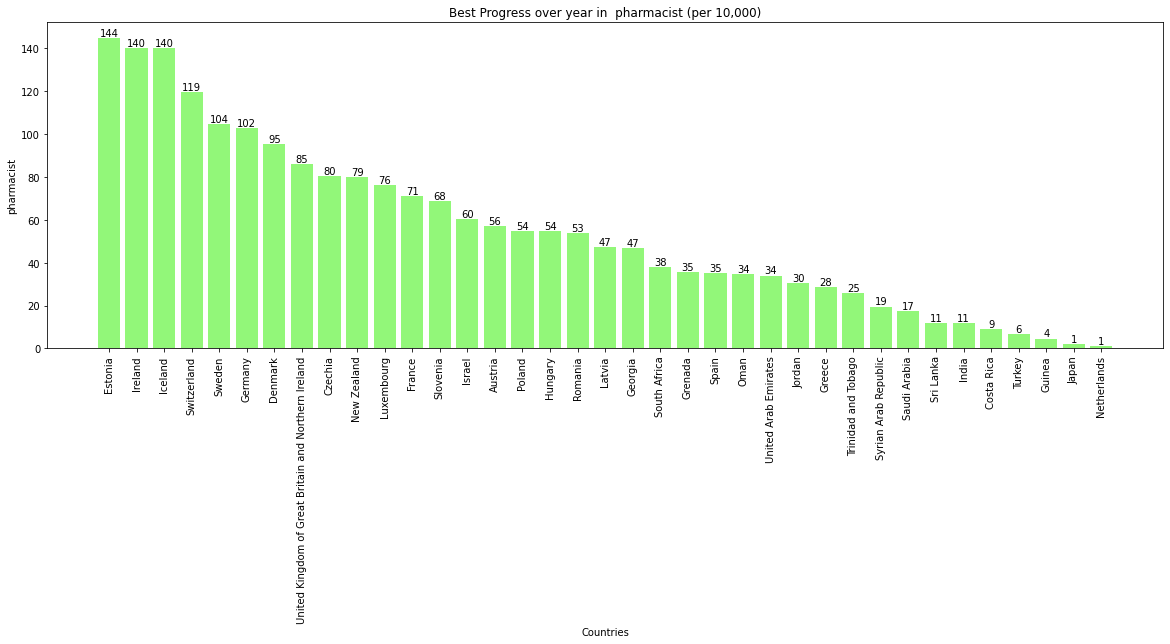

In [70]:
tempData = pharmacist[pharmacist['Period'] == 2016]
bestCountries=tempData['Location'].values.tolist()
tempData = doctor[doctor.Location.isin(bestCountries)]
tempData = tempData[tempData['Period'] == 2000]
tempData.sort_values('First Tooltip', ascending=False, inplace=True)

fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempData['Location'], tempData['First Tooltip'], color = "#92f779")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("pharmacist")
plt.title("Best Progress over year in  pharmacist (per 10,000)")
plt.show()

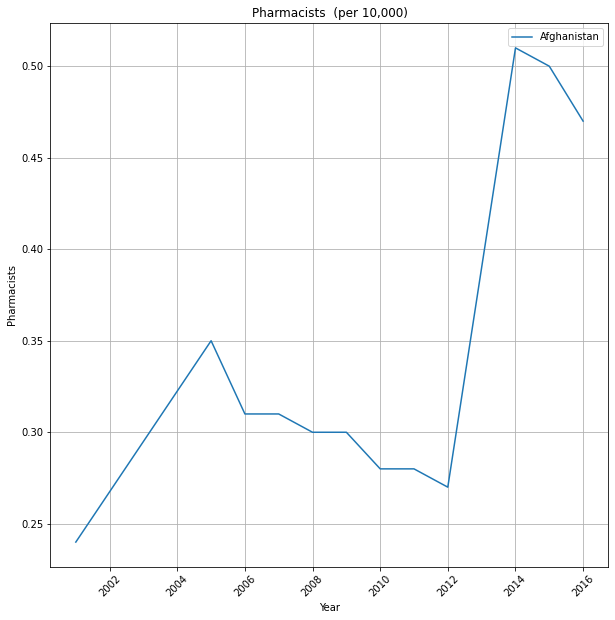

In [71]:
bestCountries=doctor['Location'].values.tolist()
countries=bestCountries[0:1]
compareCountries(countries)

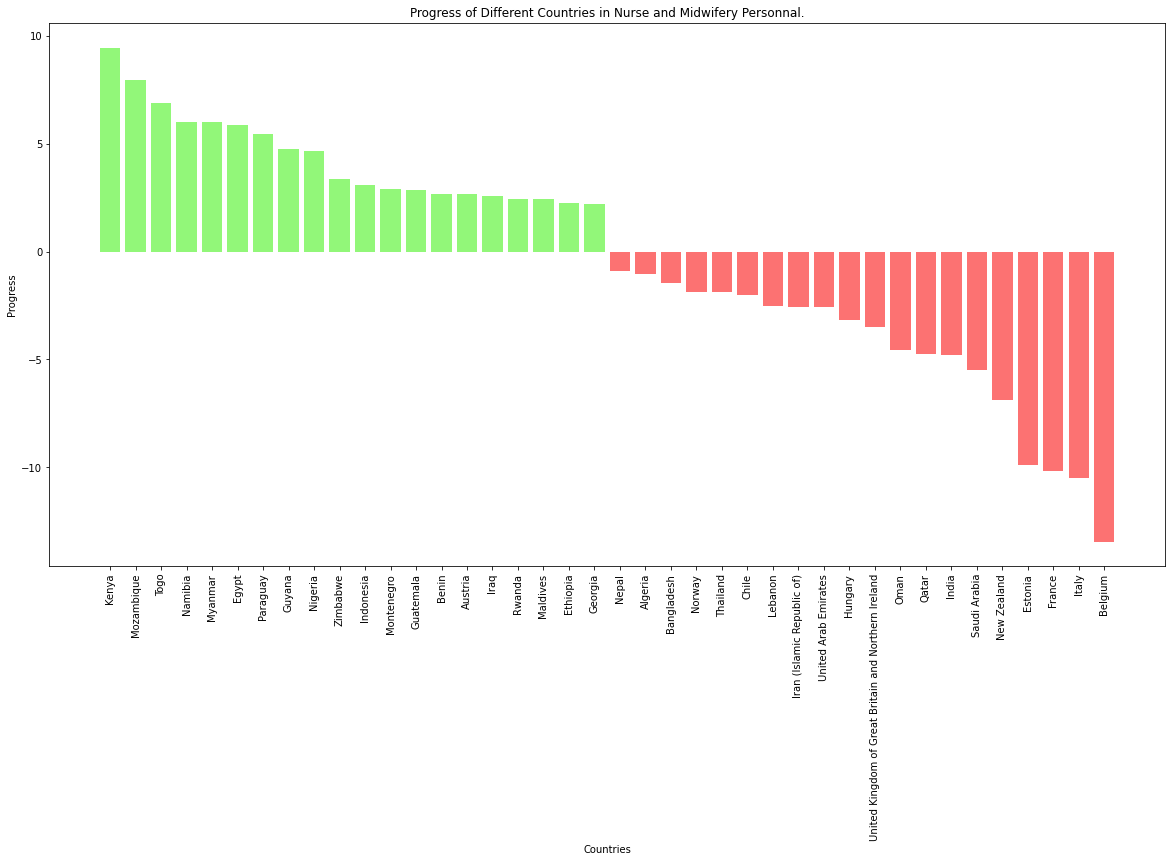

In [72]:
tempData2018 = pharmacist[pharmacist['Period'] == 2018]
tempData2000 = pharmacist[pharmacist['Period'] == 2000]
tempData2018.reset_index(inplace=True)
tempData2000.reset_index(inplace=True)
tempData = tempData2018.join(tempData2000, lsuffix='_18', rsuffix='_00')
tempData['progress'] = tempData['First Tooltip_00'] - tempData['First Tooltip_18']
tempData = tempData[['Location_18', 'progress']].sort_values('progress', ascending=False)
tempDataTop = tempData[:20]
tempDataBot = tempData[-20:]

fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
rects1 = ax1.bar(tempDataTop['Location_18'], tempDataTop['progress'], color = '#92f779')
rects1 = ax1.bar(tempDataBot['Location_18'], tempDataBot['progress'], color = '#fc7272')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.xlabel("Countries")
plt.ylabel("Progress")
plt.title("Progress of Different pharmacist(per 10000).")
plt.show()